In [1]:
from pretty_plot import *

In [2]:
def check_bench(first, second, bench=10):
    X = 0
    Y = 0
    for i in range(len(first)):
        if first[i] > bench:
            X += 1
            if second[i] < first[i]:
                Y += 1
    print('Of the {} tests which took more than {} seconds to run without LFP countermodels,'.format(X, bench))
    print('{} were faster when LFP countermodels were turned on.'.format(Y))

In [3]:
# Process main results
#names, results_cex = process_done('done_counterexample.txt')
names, results_cex = process_done('lucas_cex_out.txt')
cex = [results_cex[name][0] for name in names]
cex_max = max(cex)

## 1. No counterexamples

In [4]:
# Process comparison
#_, results_nocex = process_done('done_no-cex-popl.txt')
_, results_nocex = process_done('lucas_no-true-cex.txt')
nocex = [results_nocex[name][0] for name in names]

<Figure size 432x288 with 0 Axes>

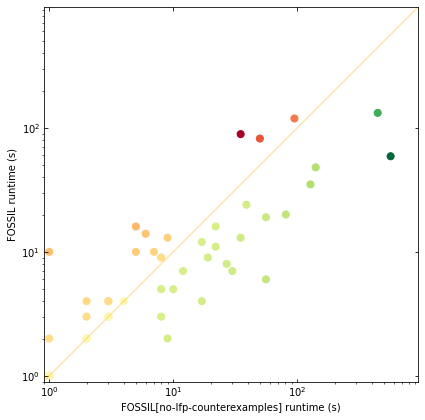

Of the 20 tests which took more than 10 seconds to run without LFP countermodels,
17 were faster when LFP countermodels were turned on.


In [5]:
# Plot
m = max([max(nocex), cex_max])
x = adjust(nocex, mx=m)
y = adjust(cex, mx=m)
pretty_plot(x, y, x_name='FOSSIL[no-lfp-counterexamples]', tm_val=m+1)
check_bench(x, y)

## 2. CVC4Sy

In [6]:
# Process comparison
#_, results_cvc4sy = process_done('done_cvc4sy-popl.txt')
_, results_cvc4sy = process_done('lucas_cvc4sy.txt')
cvc4sy = [results_cvc4sy[name][0] for name in names]

<Figure size 432x288 with 0 Axes>

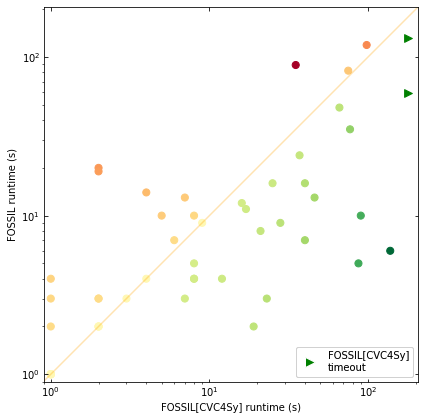

Of the 22 tests which took more than 10 seconds to run without LFP countermodels,
19 were faster when LFP countermodels were turned on.


In [7]:
# Plot
m = max([max(cvc4sy), cex_max])
x = adjust(cvc4sy, mx=m)
y = adjust(cex, mx=m)
pretty_plot(x, y, x_name='FOSSIL[CVC4Sy]')
check_bench(x, y)

## 3. Streaming

In [8]:
# Process comparison
names, results_cex = process_done('done_counterexample.txt')
#names, results_cex = process_done('lucas_cex_out.txt')
cex = [results_cex[name][0] for name in names]
cex_max = max(cex)
_, results_streaming = process_done('done_streaming-popl.txt')
streaming = [results_streaming[name][0] for name in names]

<Figure size 432x288 with 0 Axes>

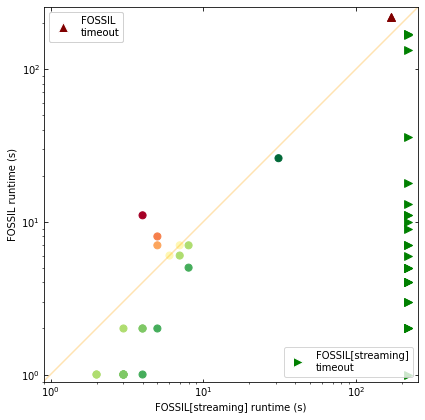

In [9]:
# Plot
m = max([max(streaming), cex_max])
x = adjust(streaming, mx=m)
y = adjust(cex, mx=m)
pretty_plot(x, y, x_name='FOSSIL[streaming]', y_leg='upper left')